### 1. Importing the Libraries

In [ ]:
import pandas as pd

: 

### 2. Importing the Dataset

In [ ]:
data = pd.read_csv('heart.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

### 3. Taking Care of Missing Values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### 4. Taking Care of Duplicate Values

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

True

In [10]:
data = data.drop_duplicates()

In [11]:
data_dup = data.duplicated().any()

In [12]:
data_dup

False

### 5. Data Processing

In [13]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [14]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [18]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 7. Feature Scaling

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [24]:
X = data.drop('target',axis=1)

In [25]:
y = data['target']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [28]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [29]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:

score_lr = round(accuracy_score(y_pred1,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_lr)+" %")

The accuracy score achieved using Naive Bayes is: 78.69 %


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
matrix= confusion_matrix(y_test, y_pred1)


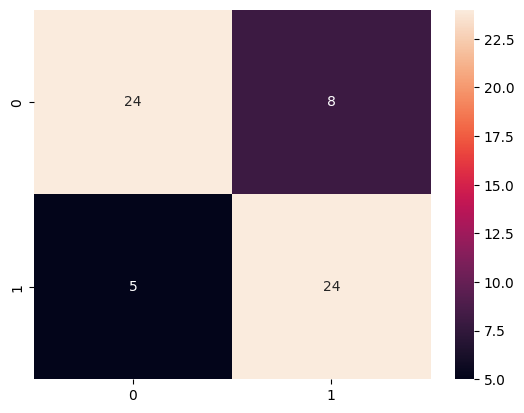

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'matrix' defined as the confusion matrix

# Plot the confusion matrix using a heatmap
sns.heatmap(matrix, annot=True, fmt="d")

# Show plot
plt.show()


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy score
accuracy_lr = accuracy_score(y_pred1, y_test)

# Precision score
precision_lr = precision_score(y_pred1, y_test)

# Recall score
recall_lr = recall_score(y_pred1, y_test)

# F1 score
f1_lr = f1_score(y_pred1, y_test)

print("Accuracy: {:.2f}%".format(accuracy_lr * 100))
print("Precision: {:.2f}".format(precision_lr))
print("Recall: {:.2f}".format(recall_lr))
print("F1 Score: {:.2f}".format(f1_lr))


Accuracy: 78.69%
Precision: 0.83
Recall: 0.75
F1 Score: 0.79


### 10. SVC

In [39]:
from sklearn import svm

In [40]:
svm = svm.SVC()

In [41]:
svm.fit(X_train,y_train)

SVC()

In [42]:
y_pred2 = svm.predict(X_test)

In [43]:
score_svm = round(accuracy_score(y_pred2,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.33 %


Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
matrix= confusion_matrix(y_test, y_pred2)

<Axes: >

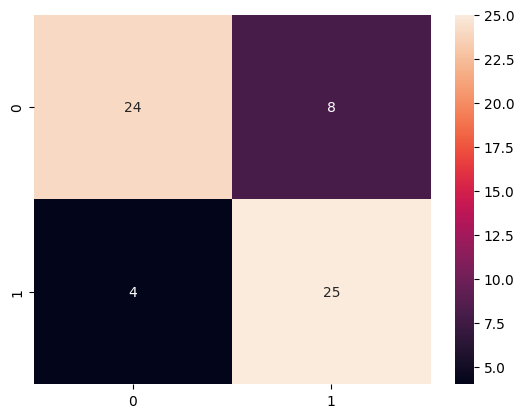

In [46]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred2)

# Precision score
precision_svm = precision_score(y_test, y_pred2)

# Recall score
recall_svm = recall_score(y_test, y_pred2)

# F1 score
f1_svm = f1_score(y_test, y_pred2)

print("Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("Precision: {:.2f}".format(precision_svm))
print("Recall: {:.2f}".format(recall_svm))
print("F1 Score: {:.2f}".format(f1_svm))


Accuracy: 80.33%
Precision: 0.76
Recall: 0.86
F1 Score: 0.81


### 11. KNeighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred3=knn.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [53]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [54]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [55]:
import matplotlib.pyplot as plt

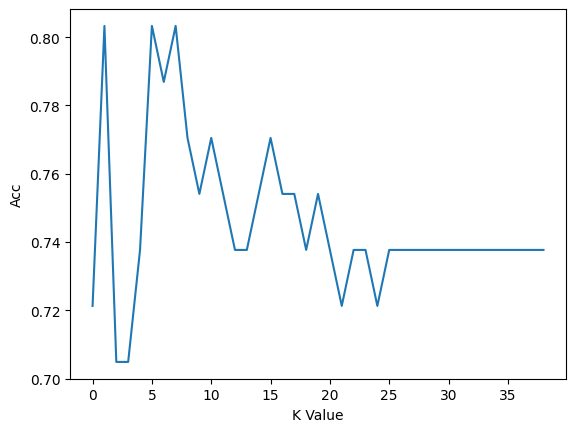

In [56]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [57]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

### Non-Linear ML Algorithms

In [58]:
data = pd.read_csv('heart.csv')

In [59]:
data = data.drop_duplicates()

In [60]:
X = data.drop('target',axis=1)
y=data['target']

In [61]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier()

In [64]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred4= dt.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

In [67]:
score_dt = round(accuracy_score(y_test,y_pred4)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.05 %


Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
matrix= confusion_matrix(y_test,y_pred4)

<Axes: >

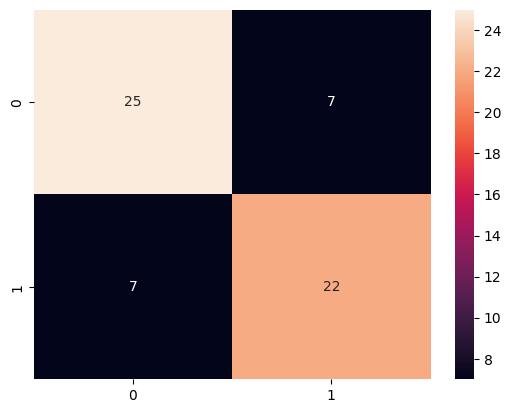

In [70]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy score
accuracy_dt = accuracy_score(y_test,y_pred4)

# Precision score
precision_dt = precision_score(y_test,y_pred4)

# Recall score
recall_dt = recall_score(y_test,y_pred4)

# F1 score
f1_dt = f1_score(y_test,y_pred4)

print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Precision: {:.2f}".format(precision_dt))
print("Recall: {:.2f}".format(recall_dt))
print("F1 Score: {:.2f}".format(f1_dt))


Accuracy: 77.05%
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


### 13. Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred5= rf.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [77]:
score_rf = round(accuracy_score(y_pred5,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 83.61 %


Confusion Matrix


In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
matrix= confusion_matrix(y_test, y_pred5)

<Axes: >

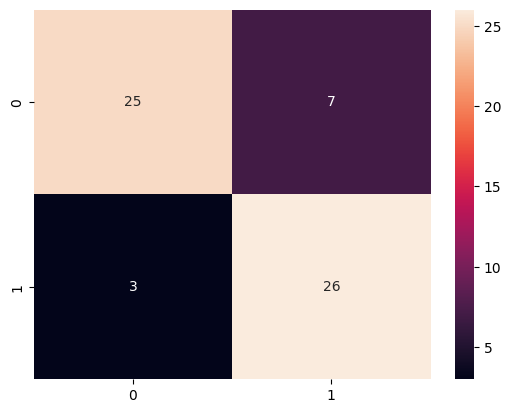

In [80]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred5)

# Precision score
precision_rf = precision_score(y_test, y_pred5)

# Recall score
recall_rf = recall_score(y_test, y_pred5)

# F1 score
f1_rf = f1_score(y_test, y_pred5)

print("Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Precision: {:.2f}".format(precision_rf))
print("Recall: {:.2f}".format(recall_rf))
print("F1 Score: {:.2f}".format(f1_rf))

Accuracy: 83.61%
Precision: 0.79
Recall: 0.90
F1 Score: 0.84


### 14. Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbc = GradientBoostingClassifier()

In [84]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [85]:
y_pred6 = gbc.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [87]:
score_xgb = round(accuracy_score(y_test,y_pred6)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 80.33 %


Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
matrix= confusion_matrix(y_test,y_pred6)

<Axes: >

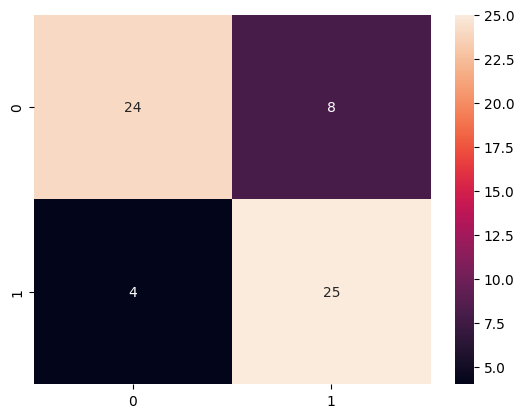

In [109]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy score
accuracy_gbc = accuracy_score(y_test,y_pred6)

# Precision score
precision_gbc = precision_score(y_test,y_pred6)

# Recall score
recall_gbc = recall_score(y_test,y_pred6)

# F1 score
f1_gbc = f1_score(y_test,y_pred6)

print("Accuracy: {:.2f}%".format(accuracy_gbc * 100))
print("Precision: {:.2f}".format(precision_gbc))
print("Recall: {:.2f}".format(recall_gbc))
print("F1 Score: {:.2f}".format(f1_gbc))


Accuracy: 80.33%
Precision: 0.76
Recall: 0.86
F1 Score: 0.81


In [91]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [92]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,77.049180
4,RF,83.606557
5,GB,80.327869


In [93]:
import seaborn as sns

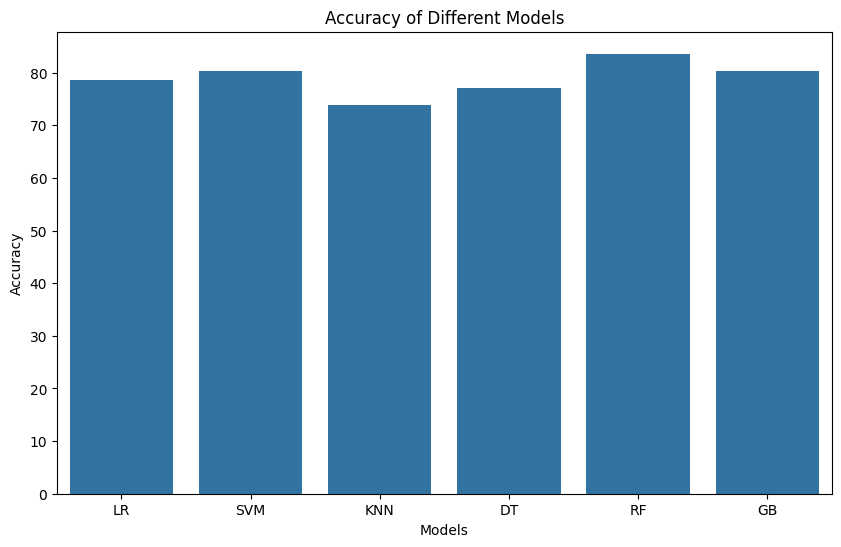

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is a DataFrame with columns 'Models' and 'ACC'

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Models', y='ACC', data=final_data)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Show the plot
plt.show()


In [95]:
X=data.drop('target',axis=1)
y=data['target']

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

In [98]:
import pandas as pd

In [99]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [100]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [101]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


### 16. Save Model Using Joblib

In [102]:
import joblib

In [103]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [104]:
model = joblib.load('model_joblib_heart')

In [105]:
model.predict(new_data)

array([0], dtype=int64)

In [106]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### GUI

In [107]:
from tkinter import *
import joblib

In [109]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Diseases").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Diseases").grid(row=31)
    
    
master = Tk()
master.title("Heart Diseases Prediction System")


label = Label(master, text = "Heart Diseases Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()


c:\Python3.7\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
